**K Nearest Neighbors**

# 1 Load Data

In [1]:
import numpy as np
from data_util import load_CIFAR10
X_train, y_train, X_test, y_test = load_CIFAR10()
print('train data shape:', X_train.shape)
print('train label shape:', y_train.shape)
print('test data shape:', X_test.shape)
print('test label shape:', y_test.shape)

train data shape: (50000, 32, 32, 3)
train label shape: (50000,)
test data shape: (10000, 32, 32, 3)
test label shape: (10000,)


## 1.1 display the images

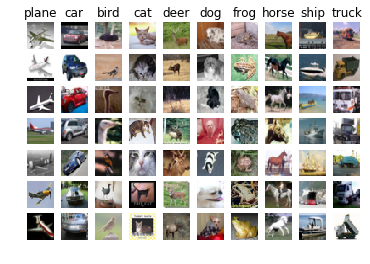

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_class = len(classes)
sample_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_class +y+1
        plt.subplot(sample_per_class, num_class, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i==0:
            plt.title(cls)
plt.show()

# 2 subsample and reshape the data

In [3]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [4]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


# 3 Train the data

In [5]:
from KNearestNeighbor import KNearestNeighbor
knn = KNearestNeighbor(k=1)
knn.fit(X_train, y_train)

In [7]:
pred = knn.predict(X_test)
print('accuary is ',(pred==y_test).sum()/y_test.shape)

accuary is  [ 0.29]


In [9]:
# choose k equals 5
knn = KNearestNeighbor(k=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('accuary is:',(pred==y_test).sum()/len(y_test))

accuary is: 0.302


# 4 cross-validation

In [ ]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10]

X_train_folds = []
y_train_folds = []
y_train_ = y_train.reshape(-1, 1)
X_train_folds , y_train_folds = np.array_split(X_train, 5), np.array_split(y_train_, 5)
k_to_accuracies = {}

for k_ in k_choices:
    k_to_accuracies.setdefault(k_, [])
for i in range(num_folds):
    X_val_train = np.vstack(X_train_folds[0:i] + X_train_folds[i+1:])
    y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i+1:])
    y_val_train = y_val_train[:,0]
    for k_ in k_choices:
        knn = KNearestNeighbor(k=k_)
        knn.fit(X_val_train, y_val_train)
        y_val_pred = knn.predict(X_train_folds[i])
        num_correct =(y_val_pred == y_train_folds).sum()
        accuracy = float(num_correct) / len(y_val_pred)
        k_to_accuracies[k_] = k_to_accuracies[k_] + [accuracy]
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print ('k = %d, accuracy = %f' % (k, accuracy))